In [17]:
from random import uniform
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_table('spotify.csv')
data.head()


,"title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity"
0,"Blinding Lights,The Weeknd,canadian contempora..."
1,"Watermelon Sugar,Harry Styles,pop,2019,95,82,5..."
2,"Mood (feat. iann dior),24kGoldn,cali rap,2021,..."
3,"Someone You Loved,Lewis Capaldi,pop,2019,110,4..."
4,"Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,..."


In [33]:
from random import uniform
import pandas as pd
import math
import matplotlib.pyplot as plt
df= pd.read_csv("spotify.csv")


class BeesAlgo:
    
    def __init__(self):
        self.n = 50  # number of scout bees
        self.m = 15 # number of sites selected out of n visited sites
        self.e = 3 # elite patches
        self.nep = 12  # elite bees recruited
        self.nsp = 8  # non-elite bees recruited
        self.ngh = 0.1  # neighbourhood size
        self.maxiter = 500 # number of iterations

    # step 1
    def rand_init_extended(self, number_of_coordinates, rng1, rng2):
        result = []
        for i in range(number_of_coordinates):
            result.append((uniform(rng1[0], rng1[1]), uniform(rng2[0], rng2[1])))
        return result

    def rand_init(self, rng):
        return self.rand_init_extended(self.n, rng, rng)

    def de_jong(self, arr):
        # arr[0] = x1, arr[1] = x2
        mx = 3905.93 - 100 * (arr[0] ** 2 - arr[1]) ** 2 - (1 - arr[0]) ** 2
        return mx

    # step 2
    def fitness(self, flowers):
        result = []
        for i in range(len(flowers)):
            result.append((flowers[i], self.de_jong(flowers[i])))
        return result

    # step 5
    def recruitment(self, elite_patches, non_elite_patches):
        fitness_of_recruits = []
        for patch in elite_patches:
            fitness_of_recruits.append(self.max_fitness_of_recruits(patch, self.nep))
        for patch in non_elite_patches:
            fitness_of_recruits.append(self.max_fitness_of_recruits(patch, self.nsp))
        return fitness_of_recruits

    def max_fitness_of_recruits(self, patch, number_of_recruits):
        recruits = self.rand_init_extended(number_of_recruits, [patch[0][0] - self.ngh, patch[0][0] + self.ngh],
                                           [patch[0][1] - self.ngh, patch[0][1] + self.ngh])
        recruits.append(patch[0])
        return self.maximum(recruits)

    def maximum(self, flowers):
        sites = self.fitness(flowers)
        sites = sorted(sites, reverse=True, key=lambda x: x[1])
        return sites[0]

    # step 7
    def remaining_bees(self):
        bees = self.rand_init_extended(self.n-self.m, [-2.048, 2.048], [-2.048, 2.048])
        return self.fitness(bees)

    def main(self):
        sites = self.rand_init([-2.048, 2.048])
        result = self.fitness(sites)
        for i in range(self.maxiter):
            # forming new population
            population_fitness = sorted(result, reverse=True, key=lambda x: x[1])
            elite = population_fitness[:self.e]
            non_elite = population_fitness[self.e:self.m]
            best_recruits = self.recruitment(elite, non_elite)
            rb = self.remaining_bees()
            result = best_recruits + rb
        population_fitness = sorted(result, reverse=True, key=lambda x: x[1])
        return population_fitness

#print(b.main())
#sns.swarmplot(data=df, x=b, y=b.main())
b = BeesAlgo()
import seaborn as sns
sns.swarmplot(data=df, x=median(b.main()), y=mean(b.main()))


NameError: name 'median' is not defined

In [34]:
b = BeesAlgo()
import seaborn as sns
sns.swarmplot(data=df, x=b.main().median(), y=b.main().mean())

AttributeError: 'list' object has no attribute 'median'

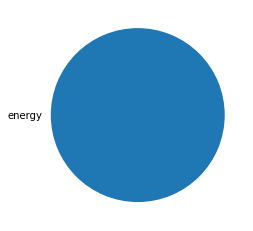

In [24]:
tmpdf=df.energy.value_counts()
s=tmpdf[tmpdf>100]
s['energy']=tmpdf.values[tmpdf.values<100].sum()
plt.pie(s.values, labels= s.index);
